In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

from xgboost import XGBClassifier

import matplotlib.pyplot as plt

from scipy.spatial.distance import cosine

from imblearn.over_sampling import SMOTE 
import tensorflow as tf

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
def anomalyScores(original_df, new_df):
    loss = pd.Series(np.sum((np.array(new_df) - np.array(original_df))**2, axis=1))
    anomalyScore = (loss - loss.min())/(loss.max() - loss.min())
    return anomalyScore

def plt_pre(ground_truth, ascore):
    precision, recall, thresholds = precision_recall_curve(ground_truth, ascore)
    plt.plot(np.delete(recall, np.argmax(precision)), np.delete(precision, np.argmax(precision)))
    plt.fill_between(np.delete(recall, np.argmax(precision)), np.delete(precision, np.argmax(precision)), step="pre", alpha=0.4)
    plt.xlabel('Recell')
    plt.ylabel('Precision')
    plt.title(f'Average Precision: {round(average_precision_score(ground_truth, ascore), 2)}')
    plt.show()
    
    area_under_curve = auc(x=recall, y=precision)
    print(f'Area Under Curve: {round(area_under_curve, 2)}')
    
    fpr, tpr, thresholds = roc_curve(ground_truth, ascore)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], linestyle='--', color='black')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.xlim(0)
    plt.show()

In [4]:
X = df.drop(['Class', 'Time'], axis=1)
y = df['Class']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2021, stratify=y)

In [6]:
droplist = y_train[y_train == 1].sample(frac=0.90).index.to_list()

In [7]:
y_train.drop(droplist, axis=0, inplace=True)
X_train.drop(droplist, axis=0, inplace=True)

F:\Anaconda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Auto Encoder

In [8]:
# Complete AutoEncoder
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=29, activation='linear', input_dim=29))
model.add(tf.keras.layers.Dense(units=29, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 29)                870       
                                                                 
 dense_1 (Dense)             (None, 29)                870       
                                                                 
Total params: 1,740
Trainable params: 1,740
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
6665/6665 [==============================] - 6s 934us/step - loss: 42.8838 - accuracy: 0.8950 - val_loss: 0.1997 - val_accuracy: 0.9574
Epoch 2/10
6665/6665 [==============================] - 6s 940us/step - loss: 0.8861 - accuracy: 0.9758 - val_loss: 0.2483 - val_accuracy: 0.9863
Epoch 3/10
6665/6665 [==============================] - 6s 943us/step - loss: 0.7314 - accuracy: 0.9888 - val_loss: 0.4707 - val_accuracy: 0.9860
Epoch 4/10
6665/6665 [==============================] - 6s 924us/step - loss: 0.4705 - accuracy: 0.9899 - val_loss: 0.0189 - val_accuracy: 0.9946
Epoch 5/10
6665/6665 [==============================] - 6s 915us/step - loss: 0.5889 - accuracy: 0.9911 - val_loss: 0.0049 - val_accuracy: 0.9968
Epoch 6/10
6665/6665 [==============================] - 6s 887us/step - loss: 0.3068 - accuracy: 0.9906 - val_loss: 0.0449 - val_accuracy: 0.9865
Epoch 7/10
6665/6665 [==============================] - 6s 908us/step - loss: 0.3214 - accuracy: 0.9906 - val_loss: 0.0376 

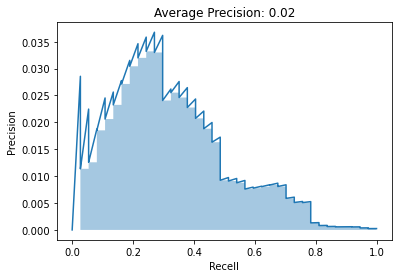

Area Under Curve: 0.01


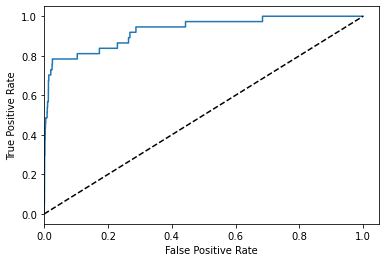

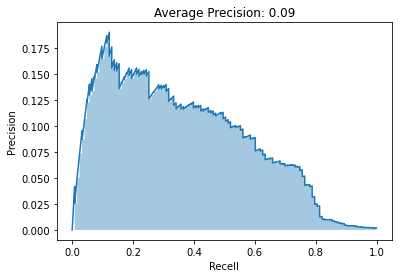

Area Under Curve: 0.09


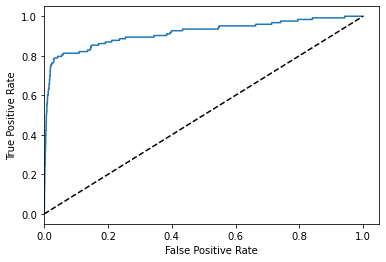

In [9]:
n_epochs = 10
batch_size = 32
history = model.fit(
    x=X_train,
    y=X_train,
    epochs=n_epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_data=(X_train, X_train),
    verbose=1)

# Trainset Results
predictions = model.predict(X_train)
anomalyScore = anomalyScores(X_train, predictions)
plt_pre(y_train, anomalyScore)

# Testset Results
predictions = model.predict(X_test)
anomalyScore = anomalyScores(X_test, predictions)
plt_pre(y_test, anomalyScore)

In [10]:
# Overcomplete AutoEncoder
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=40, activation='linear', input_dim=29))
model.add(tf.keras.layers.Dense(units=29, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 40)                1200      
                                                                 
 dense_3 (Dense)             (None, 29)                1189      
                                                                 
Total params: 2,389
Trainable params: 2,389
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
6665/6665 [==============================] - 6s 908us/step - loss: 83.8544 - accuracy: 0.8784 - val_loss: 0.1640 - val_accuracy: 0.9476
Epoch 2/10
6665/6665 [==============================] - 6s 896us/step - loss: 2.4904 - accuracy: 0.9715 - val_loss: 0.0229 - val_accuracy: 0.9857
Epoch 3/10
6665/6665 [==============================] - 6s 899us/step - loss: 0.3455 - accuracy: 0.9909 - val_loss: 0.0380 - val_accuracy: 0.9945
Epoch 4/10
6665/6665 [==============================] - 6s 900us/step - loss: 0.9900 - accuracy: 0.9878 - val_loss: 0.0094 - val_accuracy: 0.9912
Epoch 5/10
6665/6665 [==============================] - 6s 905us/step - loss: 0.3211 - accuracy: 0.9912 - val_loss: 0.0034 - val_accuracy: 0.9967
Epoch 6/10
6665/6665 [==============================] - 6s 895us/step - loss: 0.3269 - accuracy: 0.9907 - val_loss: 0.0139 - val_accuracy: 0.9921
Epoch 7/10
6665/6665 [==============================] - 6s 916us/step - loss: 0.3277 - accuracy: 0.9928 - val_loss: 0.0031 

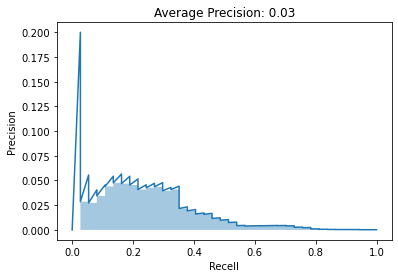

Area Under Curve: 0.02


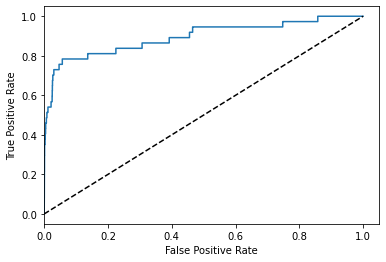

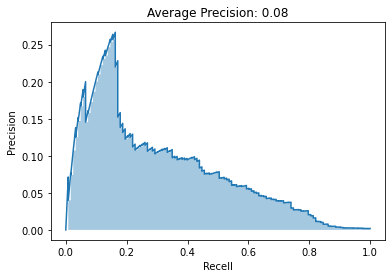

Area Under Curve: 0.08


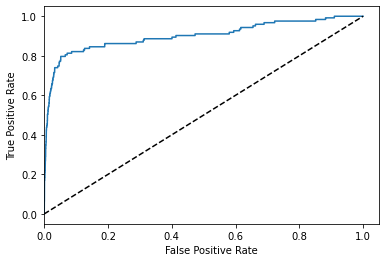

In [11]:
n_epochs = 10
batch_size = 32
history = model.fit(
    x=X_train,
    y=X_train,
    epochs=n_epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_data=(X_train, X_train),
    verbose=1)

# Trainset Results
predictions = model.predict(X_train)
anomalyScore = anomalyScores(X_train, predictions)
plt_pre(y_train, anomalyScore)

# Testset Results
predictions = model.predict(X_test)
anomalyScore = anomalyScores(X_test, predictions)
plt_pre(y_test, anomalyScore)

In [12]:
# Overcomplete AutoEncoder
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=45, activation='linear', input_dim=29))
model.add(tf.keras.layers.Dense(units=29, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 45)                1350      
                                                                 
 dense_5 (Dense)             (None, 29)                1334      
                                                                 
Total params: 2,684
Trainable params: 2,684
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
6665/6665 [==============================] - 7s 971us/step - loss: 37.0642 - accuracy: 0.9130 - val_loss: 0.1030 - val_accuracy: 0.9742
Epoch 2/10
6665/6665 [==============================] - 6s 954us/step - loss: 2.0006 - accuracy: 0.9835 - val_loss: 0.0161 - val_accuracy: 0.9922
Epoch 3/10
6665/6665 [==============================] - 6s 936us/step - loss: 0.7293 - accuracy: 0.9913 - val_loss: 0.0078 - val_accuracy: 0.9947
Epoch 4/10
6665/6665 [==============================] - 6s 959us/step - loss: 0.8145 - accuracy: 0.9903 - val_loss: 0.0028 - val_accuracy: 0.9965
Epoch 5/10
6665/6665 [==============================] - 6s 931us/step - loss: 0.5361 - accuracy: 0.9877 - val_loss: 0.0015 - val_accuracy: 0.9982
Epoch 6/10
6665/6665 [==============================] - 6s 949us/step - loss: 0.4301 - accuracy: 0.9913 - val_loss: 0.0016 - val_accuracy: 0.9972
Epoch 7/10
6665/6665 [==============================] - 6s 940us/step - loss: 0.5760 - accuracy: 0.9870 - val_loss: 0.0104 

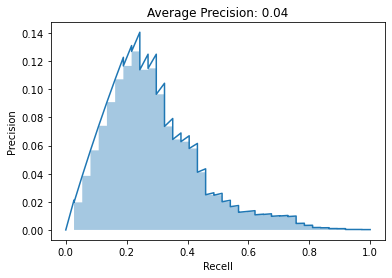

Area Under Curve: 0.04


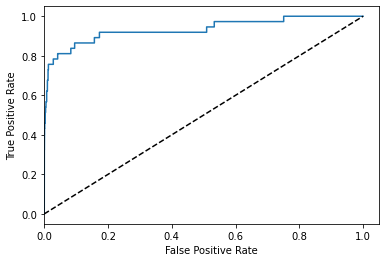

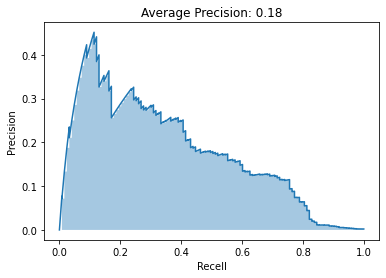

Area Under Curve: 0.18


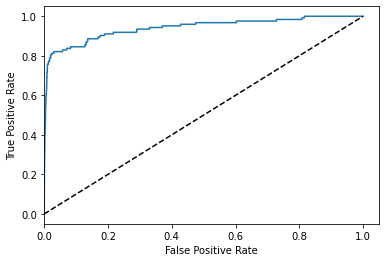

In [13]:
n_epochs = 10
batch_size = 32
history = model.fit(
    x=X_train,
    y=X_train,
    epochs=n_epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_data=(X_train, X_train),
    verbose=1)

# Trainset Results
predictions = model.predict(X_train)
anomalyScore = anomalyScores(X_train, predictions)
plt_pre(y_train, anomalyScore)

# Testset Results
predictions = model.predict(X_test)
anomalyScore = anomalyScores(X_test, predictions)
plt_pre(y_test, anomalyScore)

In [14]:
# Undercomplete AutoEncoder
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=20, activation='linear', input_dim=29))
model.add(tf.keras.layers.Dense(units=29, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                600       
                                                                 
 dense_7 (Dense)             (None, 29)                609       
                                                                 
Total params: 1,209
Trainable params: 1,209
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
6665/6665 [==============================] - 7s 972us/step - loss: 98.4578 - accuracy: 0.8578 - val_loss: 0.4317 - val_accuracy: 0.9130
Epoch 2/10
6665/6665 [==============================] - 6s 955us/step - loss: 1.0407 - accuracy: 0.9275 - val_loss: 0.2551 - val_accuracy: 0.9379
Epoch 3/10
6665/6665 [==============================] - 6s 951us/step - loss: 0.8400 - accuracy: 0.9445 - val_loss: 0.2785 - val_accuracy: 0.9534
Epoch 4/10
6665/6665 [==============================] - 6s 916us/step - loss: 0.7049 - accuracy: 0.9561 - val_loss: 0.1823 - val_accuracy: 0.9620
Epoch 5/10
6665/6665 [==============================] - 6s 900us/step - loss: 0.5915 - accuracy: 0.9635 - val_loss: 0.1569 - val_accuracy: 0.9683
Epoch 6/10
6665/6665 [==============================] - 6s 924us/step - loss: 0.9170 - accuracy: 0.9617 - val_loss: 0.3475 - val_accuracy: 0.9519
Epoch 7/10
6665/6665 [==============================] - 6s 961us/step - loss: 0.3600 - accuracy: 0.9676 - val_loss: 0.1389 

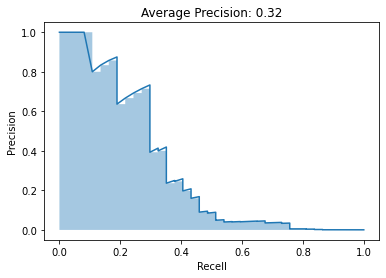

Area Under Curve: 0.31


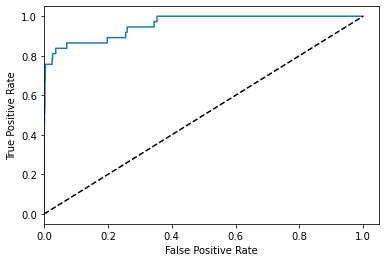

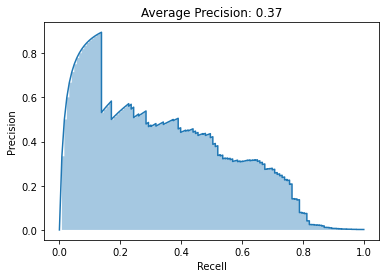

Area Under Curve: 0.37


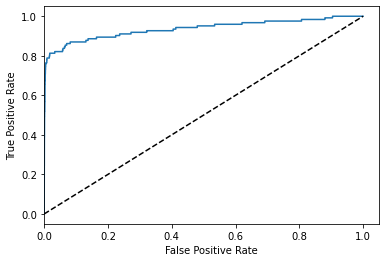

In [15]:
n_epochs = 10
batch_size = 32
history = model.fit(
    x=X_train,
    y=X_train,
    epochs=n_epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_data=(X_train, X_train),
    verbose=1)

# Trainset Results
predictions = model.predict(X_train)
anomalyScore = anomalyScores(X_train, predictions)
plt_pre(y_train, anomalyScore)

# Testset Results
predictions = model.predict(X_test)
anomalyScore = anomalyScores(X_test, predictions)
plt_pre(y_test, anomalyScore)

In [16]:
# Undercomplete AutoEncoder
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=15, activation='linear', input_dim=29))
model.add(tf.keras.layers.Dense(units=29, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 15)                450       
                                                                 
 dense_9 (Dense)             (None, 29)                464       
                                                                 
Total params: 914
Trainable params: 914
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
6665/6665 [==============================] - 6s 928us/step - loss: 57.2895 - accuracy: 0.8667 - val_loss: 0.4998 - val_accuracy: 0.9104
Epoch 2/10
6665/6665 [==============================] - 6s 914us/step - loss: 1.0483 - accuracy: 0.9212 - val_loss: 0.4076 - val_accuracy: 0.9265
Epoch 3/10
6665/6665 [==============================] - 6s 924us/step - loss: 1.3283 - accuracy: 0.9293 - val_loss: 0.3886 - val_accuracy: 0.9320
Epoch 4/10
6665/6665 [==============================] - 6s 911us/step - loss: 0.6929 - accuracy: 0.9377 - val_loss: 0.6026 - val_accuracy: 0.9430
Epoch 5/10
6665/6665 [==============================] - 6s 921us/step - loss: 0.6321 - accuracy: 0.9445 - val_loss: 0.4584 - val_accuracy: 0.9455
Epoch 6/10
6665/6665 [==============================] - 6s 941us/step - loss: 0.6292 - accuracy: 0.9488 - val_loss: 0.3188 - val_accuracy: 0.9521
Epoch 7/10
6665/6665 [==============================] - 6s 904us/step - loss: 0.5181 - accuracy: 0.9530 - val_loss: 0.7312 

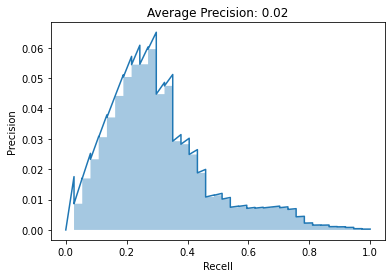

Area Under Curve: 0.02


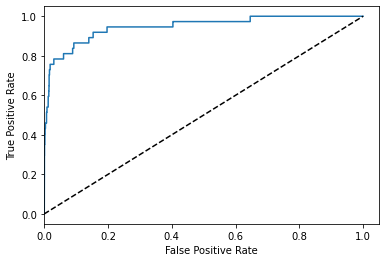

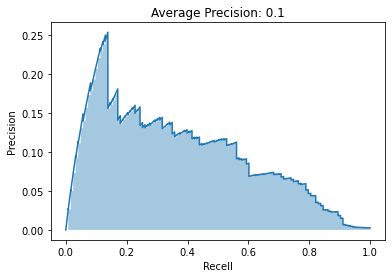

Area Under Curve: 0.1


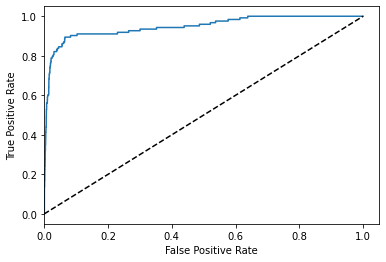

In [17]:
n_epochs = 10
batch_size = 32
history = model.fit(
    x=X_train,
    y=X_train,
    epochs=n_epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_data=(X_train, X_train),
    verbose=1)

# Trainset Results
predictions = model.predict(X_train)
anomalyScore = anomalyScores(X_train, predictions)
plt_pre(y_train, anomalyScore)

# Testset Results
predictions = model.predict(X_test)
anomalyScore = anomalyScores(X_test, predictions)
plt_pre(y_test, anomalyScore)

In [18]:
# Undercomplete AutoEncoder
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=10, activation='linear', input_dim=29))
model.add(tf.keras.layers.Dense(units=29, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                300       
                                                                 
 dense_11 (Dense)            (None, 29)                319       
                                                                 
Total params: 619
Trainable params: 619
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
6665/6665 [==============================] - 7s 965us/step - loss: 59.2769 - accuracy: 0.8473 - val_loss: 0.6619 - val_accuracy: 0.8748
Epoch 2/10
6665/6665 [==============================] - 6s 905us/step - loss: 1.1091 - accuracy: 0.8838 - val_loss: 0.6663 - val_accuracy: 0.8973
Epoch 3/10
6665/6665 [==============================] - 6s 904us/step - loss: 1.0018 - accuracy: 0.9038 - val_loss: 0.5883 - val_accuracy: 0.9085
Epoch 4/10
6665/6665 [==============================] - 6s 908us/step - loss: 0.8462 - accuracy: 0.9114 - val_loss: 0.7359 - val_accuracy: 0.9166
Epoch 5/10
6665/6665 [==============================] - 6s 885us/step - loss: 0.7205 - accuracy: 0.9188 - val_loss: 0.6806 - val_accuracy: 0.9222
Epoch 6/10
6665/6665 [==============================] - 6s 897us/step - loss: 0.7727 - accuracy: 0.9200 - val_loss: 0.5319 - val_accuracy: 0.9204
Epoch 7/10
6665/6665 [==============================] - 6s 897us/step - loss: 0.7165 - accuracy: 0.9202 - val_loss: 0.5876 

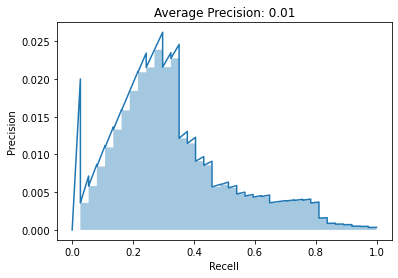

Area Under Curve: 0.01


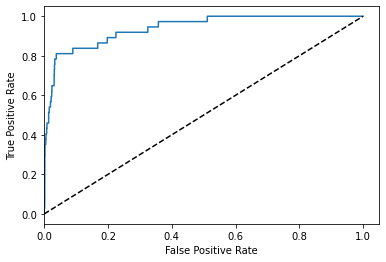

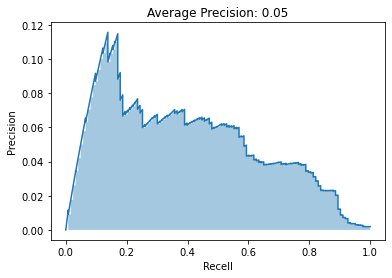

Area Under Curve: 0.05


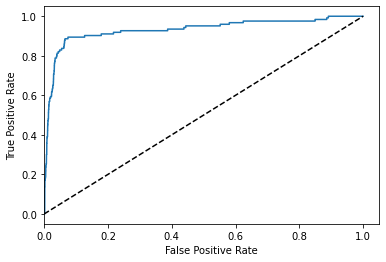

In [19]:
n_epochs = 10
batch_size = 32
history = model.fit(
    x=X_train,
    y=X_train,
    epochs=n_epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_data=(X_train, X_train),
    verbose=1)

# Trainset Results
predictions = model.predict(X_train)
anomalyScore = anomalyScores(X_train, predictions)
plt_pre(y_train, anomalyScore)

# Testset Results
predictions = model.predict(X_test)
anomalyScore = anomalyScores(X_test, predictions)
plt_pre(y_test, anomalyScore)

In [20]:
# Undercomplete AutoEncoder
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=17, activation='linear', input_dim=29))
model.add(tf.keras.layers.Dense(units=29, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 17)                510       
                                                                 
 dense_13 (Dense)            (None, 29)                522       
                                                                 
Total params: 1,032
Trainable params: 1,032
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
6665/6665 [==============================] - 6s 912us/step - loss: 264.4271 - accuracy: 0.8285 - val_loss: 0.8105 - val_accuracy: 0.8952
Epoch 2/10
6665/6665 [==============================] - 6s 886us/step - loss: 1.1438 - accuracy: 0.9231 - val_loss: 0.3275 - val_accuracy: 0.9356
Epoch 3/10
6665/6665 [==============================] - 6s 903us/step - loss: 0.7767 - accuracy: 0.9415 - val_loss: 0.8345 - val_accuracy: 0.9466
Epoch 4/10
6665/6665 [==============================] - 6s 912us/step - loss: 0.6045 - accuracy: 0.9527 - val_loss: 0.2509 - val_accuracy: 0.9555
Epoch 5/10
6665/6665 [==============================] - 6s 897us/step - loss: 0.8698 - accuracy: 0.9531 - val_loss: 0.7514 - val_accuracy: 0.9577
Epoch 6/10
6665/6665 [==============================] - 6s 909us/step - loss: 0.6234 - accuracy: 0.9561 - val_loss: 0.2204 - val_accuracy: 0.9604
Epoch 7/10
6665/6665 [==============================] - 6s 931us/step - loss: 0.4885 - accuracy: 0.9602 - val_loss: 0.2144

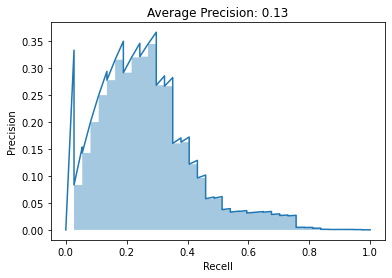

Area Under Curve: 0.12


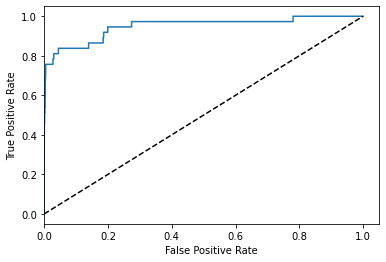

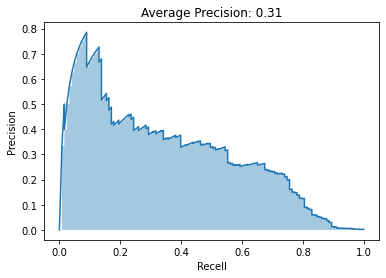

Area Under Curve: 0.31


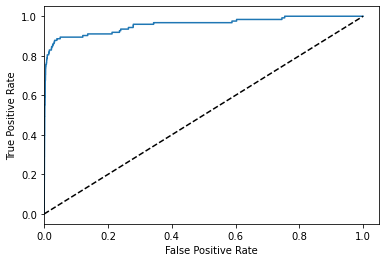

In [21]:
n_epochs = 10
batch_size = 32
history = model.fit(
    x=X_train,
    y=X_train,
    epochs=n_epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_data=(X_train, X_train),
    verbose=1)

# Trainset Results
predictions = model.predict(X_train)
anomalyScore = anomalyScores(X_train, predictions)
plt_pre(y_train, anomalyScore)

# Testset Results
predictions = model.predict(X_test)
anomalyScore = anomalyScores(X_test, predictions)
plt_pre(y_test, anomalyScore)

In [22]:
# Undercomplete Sparse (10e-5) AutoEncoder
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=15, activation='linear', input_dim=29, activity_regularizer=tf.keras.regularizers.L1(10e-5)))
model.add(tf.keras.layers.Dense(units=29, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 15)                450       
                                                                 
 dense_15 (Dense)            (None, 29)                464       
                                                                 
Total params: 914
Trainable params: 914
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
6665/6665 [==============================] - 7s 950us/step - loss: 22.0317 - accuracy: 0.8788 - val_loss: 0.5054 - val_accuracy: 0.9097
Epoch 2/10
6665/6665 [==============================] - 6s 919us/step - loss: 1.4232 - accuracy: 0.9166 - val_loss: 0.4262 - val_accuracy: 0.9204
Epoch 3/10
6665/6665 [==============================] - 6s 923us/step - loss: 0.8723 - accuracy: 0.9265 - val_loss: 0.4158 - val_accuracy: 0.9313
Epoch 4/10
6665/6665 [==============================] - 6s 917us/step - loss: 0.7055 - accuracy: 0.9351 - val_loss: 0.3607 - val_accuracy: 0.9417
Epoch 5/10
6665/6665 [==============================] - 6s 919us/step - loss: 0.7526 - accuracy: 0.9430 - val_loss: 0.3463 - val_accuracy: 0.9439
Epoch 6/10
6665/6665 [==============================] - 6s 935us/step - loss: 0.7960 - accuracy: 0.9423 - val_loss: 0.3305 - val_accuracy: 0.9456
Epoch 7/10
6665/6665 [==============================] - 6s 949us/step - loss: 0.8038 - accuracy: 0.9425 - val_loss: 0.3229 

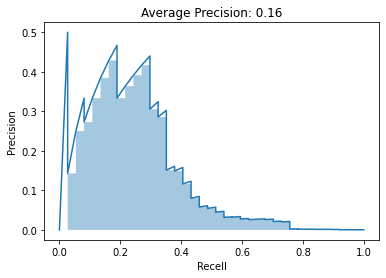

Area Under Curve: 0.14


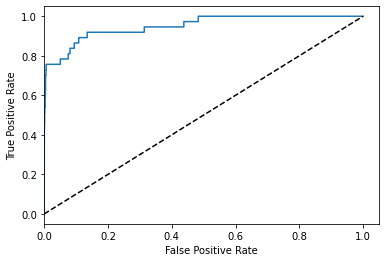

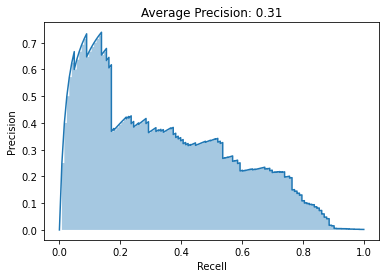

Area Under Curve: 0.3


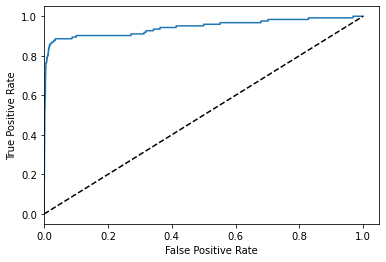

In [23]:
n_epochs = 10
batch_size = 32
history = model.fit(
    x=X_train,
    y=X_train,
    epochs=n_epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_data=(X_train, X_train),
    verbose=1)

# Trainset Results
predictions = model.predict(X_train)
anomalyScore = anomalyScores(X_train, predictions)
plt_pre(y_train, anomalyScore)

# Testset Results
predictions = model.predict(X_test)
anomalyScore = anomalyScores(X_test, predictions)
plt_pre(y_test, anomalyScore)

In [24]:
# Undercomplete Sparse (10e-6) AutoEncoder
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=15, activation='linear', input_dim=29, activity_regularizer=tf.keras.regularizers.L1(10e-6)))
model.add(tf.keras.layers.Dense(units=29, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 15)                450       
                                                                 
 dense_17 (Dense)            (None, 29)                464       
                                                                 
Total params: 914
Trainable params: 914
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
6665/6665 [==============================] - 7s 1ms/step - loss: 46.1171 - accuracy: 0.8533 - val_loss: 0.5627 - val_accuracy: 0.8869
Epoch 2/10
6665/6665 [==============================] - 6s 895us/step - loss: 1.1197 - accuracy: 0.9074 - val_loss: 0.8765 - val_accuracy: 0.9270
Epoch 3/10
6665/6665 [==============================] - 6s 933us/step - loss: 0.9677 - accuracy: 0.9341 - val_loss: 0.7461 - val_accuracy: 0.9369
Epoch 4/10
6665/6665 [==============================] - 6s 899us/step - loss: 0.7578 - accuracy: 0.9446 - val_loss: 0.3251 - val_accuracy: 0.9507
Epoch 5/10
6665/6665 [==============================] - 6s 912us/step - loss: 1.4741 - accuracy: 0.9529 - val_loss: 0.3867 - val_accuracy: 0.9469
Epoch 6/10
6665/6665 [==============================] - 6s 898us/step - loss: 0.4746 - accuracy: 0.9510 - val_loss: 0.2881 - val_accuracy: 0.9536
Epoch 7/10
6665/6665 [==============================] - 6s 898us/step - loss: 1.0543 - accuracy: 0.9537 - val_loss: 0.3252 - 

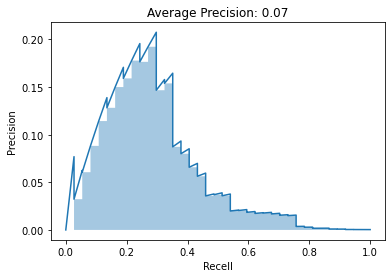

Area Under Curve: 0.06


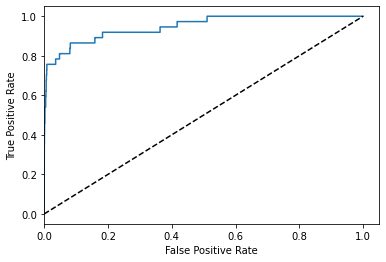

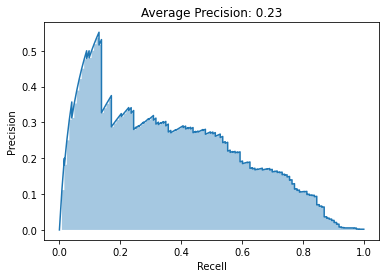

Area Under Curve: 0.23


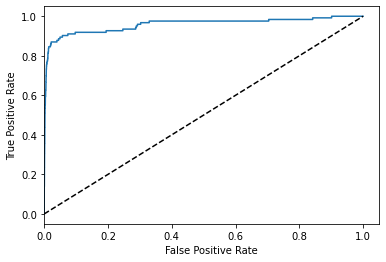

In [25]:
n_epochs = 10
batch_size = 32
history = model.fit(
    x=X_train,
    y=X_train,
    epochs=n_epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_data=(X_train, X_train),
    verbose=1)

# Trainset Results
predictions = model.predict(X_train)
anomalyScore = anomalyScores(X_train, predictions)
plt_pre(y_train, anomalyScore)

# Testset Results
predictions = model.predict(X_test)
anomalyScore = anomalyScores(X_test, predictions)
plt_pre(y_test, anomalyScore)

In [26]:
# Undercomplete Sparse (10e-7) AutoEncoder
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=15, activation='linear', input_dim=29, activity_regularizer=tf.keras.regularizers.L1(10e-7)))
model.add(tf.keras.layers.Dense(units=29, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 15)                450       
                                                                 
 dense_19 (Dense)            (None, 29)                464       
                                                                 
Total params: 914
Trainable params: 914
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
6665/6665 [==============================] - 7s 991us/step - loss: 40.6994 - accuracy: 0.8731 - val_loss: 0.5043 - val_accuracy: 0.9091
Epoch 2/10
6665/6665 [==============================] - 6s 917us/step - loss: 0.8349 - accuracy: 0.9140 - val_loss: 0.7626 - val_accuracy: 0.9235
Epoch 3/10
6665/6665 [==============================] - 6s 918us/step - loss: 1.0356 - accuracy: 0.9263 - val_loss: 0.4504 - val_accuracy: 0.9325
Epoch 4/10
6665/6665 [==============================] - 6s 907us/step - loss: 0.9817 - accuracy: 0.9345 - val_loss: 0.3478 - val_accuracy: 0.9393
Epoch 5/10
6665/6665 [==============================] - 6s 968us/step - loss: 0.5798 - accuracy: 0.9421 - val_loss: 0.3206 - val_accuracy: 0.9463
Epoch 6/10
6665/6665 [==============================] - 6s 968us/step - loss: 0.7574 - accuracy: 0.9466 - val_loss: 0.3274 - val_accuracy: 0.9460
Epoch 7/10
6665/6665 [==============================] - 6s 956us/step - loss: 0.4771 - accuracy: 0.9504 - val_loss: 6.5426 

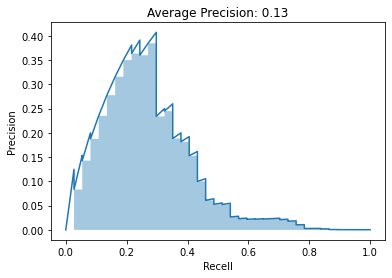

Area Under Curve: 0.12


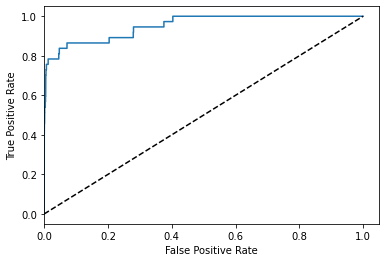

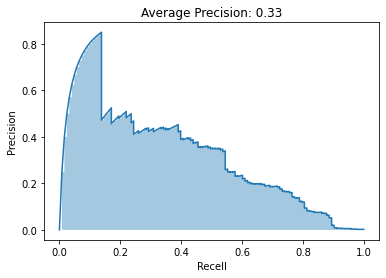

Area Under Curve: 0.32


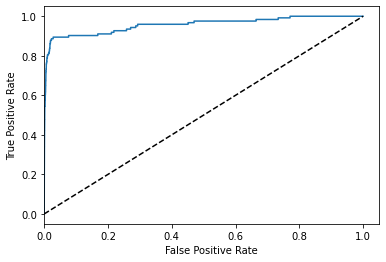

In [27]:
n_epochs = 10
batch_size = 32
history = model.fit(
    x=X_train,
    y=X_train,
    epochs=n_epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_data=(X_train, X_train),
    verbose=1)

# Trainset Results
predictions = model.predict(X_train)
anomalyScore = anomalyScores(X_train, predictions)
plt_pre(y_train, anomalyScore)

# Testset Results
predictions = model.predict(X_test)
anomalyScore = anomalyScores(X_test, predictions)
plt_pre(y_test, anomalyScore)

# Best Model So Far: Undercomplete AutoEncoder

In [29]:
# Bench Mark Model
xgbc = XGBClassifier(use_label_encoder=False, verbosity=0)
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)

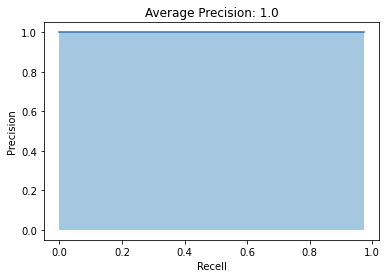

Area Under Curve: 1.0


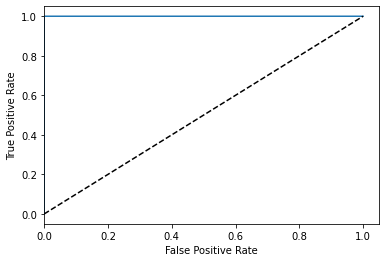

In [30]:
# Trainset Results
y_pred_proba = xgbc.predict_proba(X_train)
plt_pre(y_train, y_pred_proba[:,1])

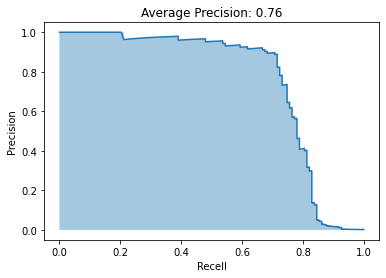

Area Under Curve: 0.76


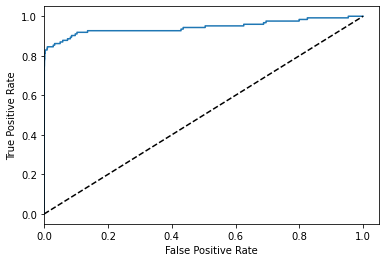

In [31]:
# Testset Results
y_pred_proba = xgbc.predict_proba(X_test)
plt_pre(y_test, y_pred_proba[:,1])

In [35]:
# Rebuild Undercomplete AutoEncoder
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=20, activation='linear', input_dim=29, name='hidden_layer'))
model.add(tf.keras.layers.Dense(units=29, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 20)                600       
                                                                 
 dense_22 (Dense)            (None, 29)                609       
                                                                 
Total params: 1,209
Trainable params: 1,209
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
6665/6665 [==============================] - 7s 959us/step - loss: 83.6185 - accuracy: 0.8692 - val_loss: 0.3609 - val_accuracy: 0.9206
Epoch 2/10
6665/6665 [==============================] - 7s 1ms/step - loss: 1.3653 - accuracy: 0.9375 - val_loss: 0.2631 - val_accuracy: 0.9464
Epoch 3/10
6665/6665 [==============================] - 7s 992us/step - loss: 0.7046 - accuracy: 0.9515 - val_loss: 0.1882 - val_accuracy: 0.9614
Epoch 4/10
6665/6665 [==============================] - 7s 986us/step - loss: 0.5513 - accuracy: 0.9646 - val_loss: 0.1655 - val_accuracy: 0.9700
Epoch 5/10
6665/6665 [==============================] - 6s 974us/step - loss: 0.4223 - accuracy: 0.9693 - val_loss: 0.1762 - val_accuracy: 0.9745
Epoch 6/10
6665/6665 [==============================] - 6s 914us/step - loss: 0.3472 - accuracy: 0.9743 - val_loss: 0.1428 - val_accuracy: 0.9789
Epoch 7/10
6665/6665 [==============================] - 6s 911us/step - loss: 0.3985 - accuracy: 0.9746 - val_loss: 0.1248 - 

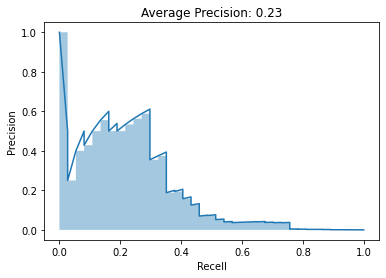

Area Under Curve: 0.22


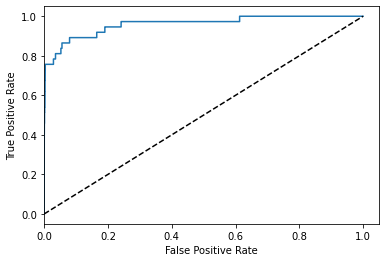

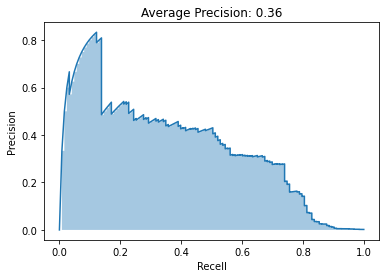

Area Under Curve: 0.35


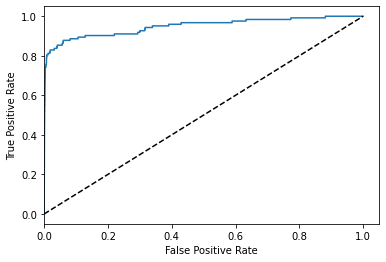

In [36]:
n_epochs = 10
batch_size = 32
history = model.fit(
    x=X_train,
    y=X_train,
    epochs=n_epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_data=(X_train, X_train),
    verbose=1)

# Trainset Results
predictions = model.predict(X_train)
anomalyScore = anomalyScores(X_train, predictions)
plt_pre(y_train, anomalyScore)

# Testset Results
predictions = model.predict(X_test)
anomalyScore = anomalyScores(X_test, predictions)
plt_pre(y_test, anomalyScore)

In [37]:
intermediate_layer_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer('hidden_layer').output)

intermediate_output_train = intermediate_layer_model.predict(X_train)
intermediate_output_test = intermediate_layer_model.predict(X_test)

In [38]:
X_train2 = pd.DataFrame(np.hstack([X_train, intermediate_output_train]), columns=list(X_train.columns)+['AE'+str(i) for i in range(intermediate_output_train.shape[1])])
X_test2 = pd.DataFrame(np.hstack([X_test, intermediate_output_test]), columns=list(X_test.columns)+['AE'+str(i) for i in range(intermediate_output_test.shape[1])])

In [39]:
xgbc = XGBClassifier(use_label_encoder=False, verbosity=0)
xgbc.fit(X_train2, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)

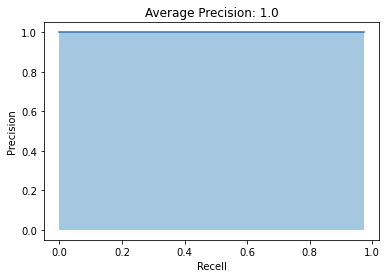

Area Under Curve: 1.0


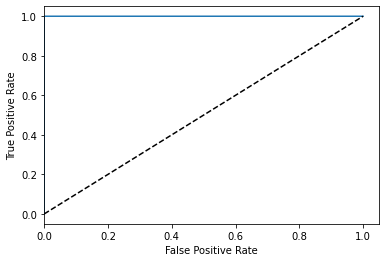

In [40]:
# Trainset Results
y_pred_proba = xgbc.predict_proba(X_train2)
plt_pre(y_train, y_pred_proba[:,1])

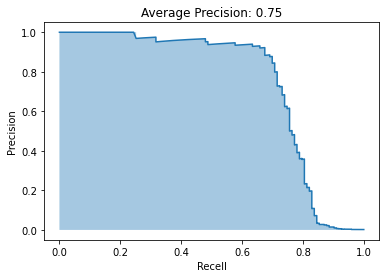

Area Under Curve: 0.75


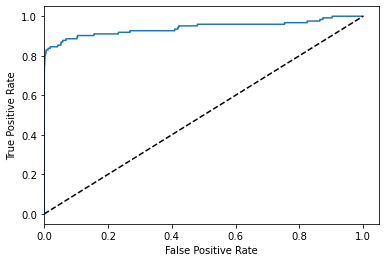

In [41]:
# Testset Results
y_pred_proba = xgbc.predict_proba(X_test2)
plt_pre(y_test, y_pred_proba[:,1])

# Semi-Supervised Learning is slightly worse

# Synthetic Minority Oversampling Technique - SMOTE
## Random Under-Sampling
### - Randomly remove majority class observations
### - Helps balance the dataset
### - Discard observations could have important information
### - May lead to bias



## Random Over-Sampling
### - Randomly add more minority observations by replication
### - No Infomation Loss
### - Prone to overfitting due to copying same information

In [42]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [43]:
# Undercomplete Sparse (10e-6) AutoEncoder
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=15, activation='linear', input_dim=29, activity_regularizer=tf.keras.regularizers.L1(10e-6), name='hidden_layer'))
model.add(tf.keras.layers.Dense(units=29, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 15)                450       
                                                                 
 dense_23 (Dense)            (None, 29)                464       
                                                                 
Total params: 914
Trainable params: 914
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
13328/13328 [==============================] - 13s 923us/step - loss: 33.6838 - accuracy: 0.8143 - val_loss: 0.5454 - val_accuracy: 0.8671
Epoch 2/10
13328/13328 [==============================] - 12s 916us/step - loss: 0.7335 - accuracy: 0.9014 - val_loss: 0.3492 - val_accuracy: 0.9340
Epoch 3/10
13328/13328 [==============================] - 12s 936us/step - loss: 0.6154 - accuracy: 0.9429 - val_loss: 0.2974 - val_accuracy: 0.9508
Epoch 4/10
13328/13328 [==============================] - 13s 993us/step - loss: 0.4564 - accuracy: 0.9505 - val_loss: 0.2809 - val_accuracy: 0.9402
Epoch 5/10
13328/13328 [==============================] - 12s 918us/step - loss: 0.3712 - accuracy: 0.9431 - val_loss: 0.2280 - val_accuracy: 0.9454
Epoch 6/10
13328/13328 [==============================] - 13s 940us/step - loss: 0.3390 - accuracy: 0.9486 - val_loss: 0.2648 - val_accuracy: 0.9611
Epoch 7/10
13328/13328 [==============================] - 13s 959us/step - loss: 0.3207 - accuracy: 0.959

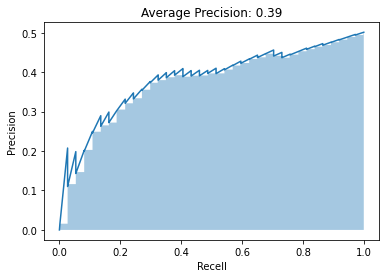

Area Under Curve: 0.38


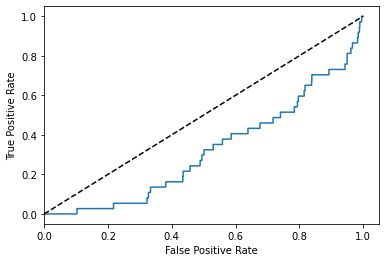

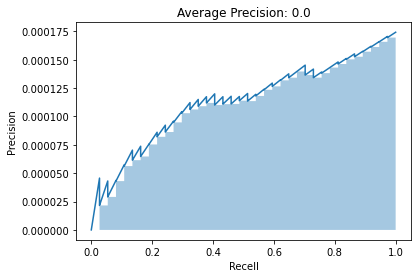

Area Under Curve: 0.0


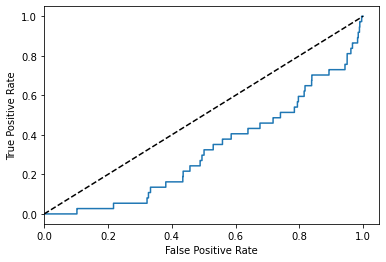

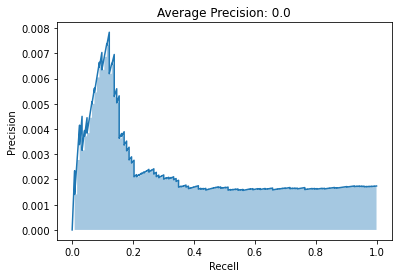

Area Under Curve: 0.0


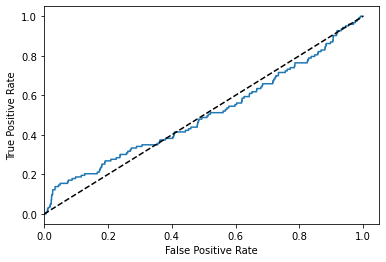

In [44]:
n_epochs = 10
batch_size = 32
history = model.fit(
    x=X_train_resampled,
    y=X_train_resampled,
    epochs=n_epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_data=(X_train_resampled, X_train_resampled),
    verbose=1)

# Trainset (Resampled) Results
predictions = model.predict(X_train_resampled)
anomalyScore = anomalyScores(X_train_resampled, predictions)
plt_pre(y_train_resampled, anomalyScore)

# Trainset Results
predictions = model.predict(X_train)
anomalyScore = anomalyScores(X_train, predictions)
plt_pre(y_train, anomalyScore)

# Testset Results
predictions = model.predict(X_test)
anomalyScore = anomalyScores(X_test, predictions)
plt_pre(y_test, anomalyScore)

In [45]:
intermediate_layer_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer('hidden_layer').output)

intermediate_output_train = intermediate_layer_model.predict(X_train_resampled)
intermediate_output_test = intermediate_layer_model.predict(X_test)

In [46]:
X_train2 = pd.DataFrame(np.hstack([X_train_resampled, intermediate_output_train]), columns=list(X_train_resampled.columns)+['AE'+str(i) for i in range(intermediate_output_train.shape[1])])
X_test2 = pd.DataFrame(np.hstack([X_test, intermediate_output_test]), columns=list(X_test.columns)+['AE'+str(i) for i in range(intermediate_output_test.shape[1])])

In [47]:
xgbc = XGBClassifier(use_label_encoder=False, verbosity=0)
xgbc.fit(X_train2, y_train_resampled)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)

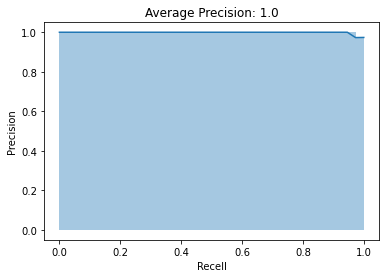

Area Under Curve: 1.0


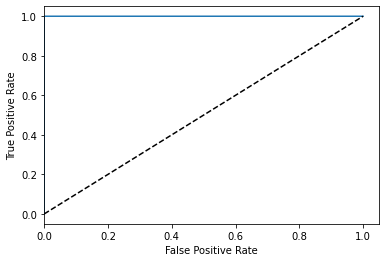

In [48]:
# Trainset Results
y_pred_proba = xgbc.predict_proba(X_train)
plt_pre(y_train, y_pred_proba[:,1])

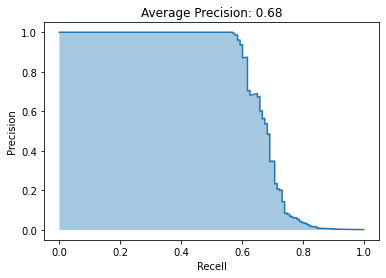

Area Under Curve: 0.68


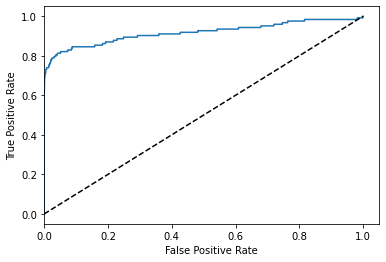

In [49]:
# Testset Results
y_pred_proba = xgbc.predict_proba(X_test)
plt_pre(y_test, y_pred_proba[:,1])

# Oversampling make it even worse

# Try SMOTE

In [50]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [51]:
# Undercomplete Sparse (10e-6) AutoEncoder
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=15, activation='linear', input_dim=29, activity_regularizer=tf.keras.regularizers.L1(10e-6), name='hidden_layer'))
model.add(tf.keras.layers.Dense(units=29, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 15)                450       
                                                                 
 dense_24 (Dense)            (None, 29)                464       
                                                                 
Total params: 914
Trainable params: 914
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
13328/13328 [==============================] - 12s 919us/step - loss: 0.2757 - accuracy: 0.9639 - val_loss: 0.2477 - val_accuracy: 0.9661
Epoch 2/10
13328/13328 [==============================] - 12s 901us/step - loss: 0.2497 - accuracy: 0.9656 - val_loss: 0.1844 - val_accuracy: 0.9674
Epoch 3/10
13328/13328 [==============================] - 12s 903us/step - loss: 0.2839 - accuracy: 0.9637 - val_loss: 0.2359 - val_accuracy: 0.9659
Epoch 4/10
13328/13328 [==============================] - 12s 905us/step - loss: 0.2562 - accuracy: 0.9661 - val_loss: 0.1768 - val_accuracy: 0.9652
Epoch 5/10
13328/13328 [==============================] - 12s 904us/step - loss: 0.2422 - accuracy: 0.9652 - val_loss: 0.1742 - val_accuracy: 0.9663
Epoch 6/10
13328/13328 [==============================] - 12s 900us/step - loss: 0.2478 - accuracy: 0.9653 - val_loss: 0.2041 - val_accuracy: 0.9664
Epoch 7/10
13328/13328 [==============================] - 12s 909us/step - loss: 0.2546 - accuracy: 0.9651

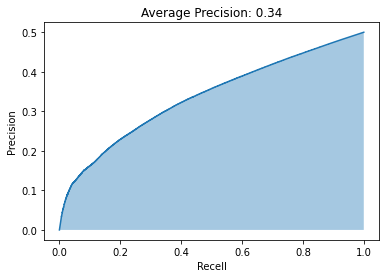

Area Under Curve: 0.34


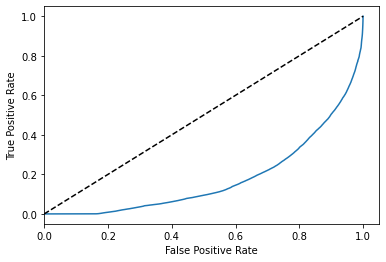

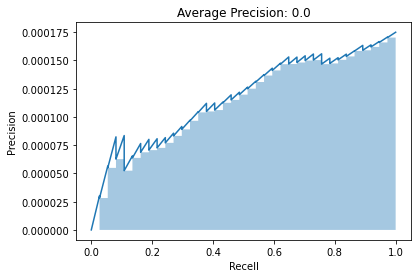

Area Under Curve: 0.0


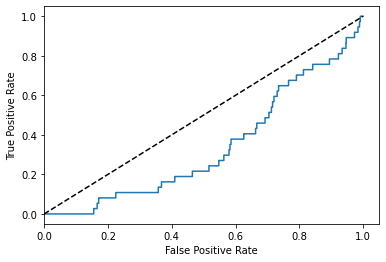

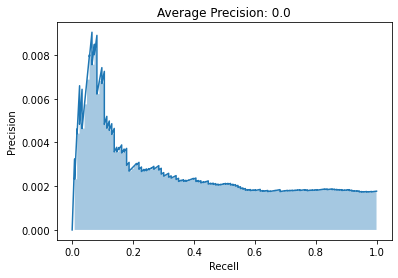

Area Under Curve: 0.0


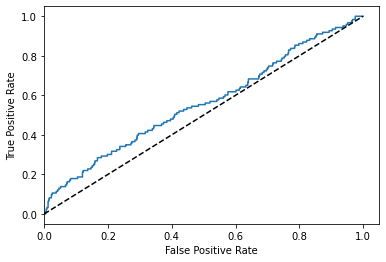

In [53]:
n_epochs = 10
batch_size = 32
history = model.fit(
    x=X_res,
    y=X_res,
    epochs=n_epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_data=(X_res, X_res),
    verbose=1)

# Trainset (Resampled) Results
predictions = model.predict(X_res)
anomalyScore = anomalyScores(X_res, predictions)
plt_pre(y_res, anomalyScore)

# Trainset Results
predictions = model.predict(X_train)
anomalyScore = anomalyScores(X_train, predictions)
plt_pre(y_train, anomalyScore)

# Testset Results
predictions = model.predict(X_test)
anomalyScore = anomalyScores(X_test, predictions)
plt_pre(y_test, anomalyScore)

In [55]:
intermediate_layer_model = tf.keras.Model(inputs=model.input, outputs=model.get_layer('hidden_layer').output)

intermediate_output_train = intermediate_layer_model.predict(X_res)
intermediate_output_test = intermediate_layer_model.predict(X_test)

In [56]:
X_train2 = pd.DataFrame(np.hstack([X_res, intermediate_output_train]), columns=list(X_res.columns)+['AE'+str(i) for i in range(intermediate_output_train.shape[1])])
X_test2 = pd.DataFrame(np.hstack([X_test, intermediate_output_test]), columns=list(X_test.columns)+['AE'+str(i) for i in range(intermediate_output_test.shape[1])])

In [57]:
xgbc = XGBClassifier(use_label_encoder=False, verbosity=0)
xgbc.fit(X_train2, y_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=0)

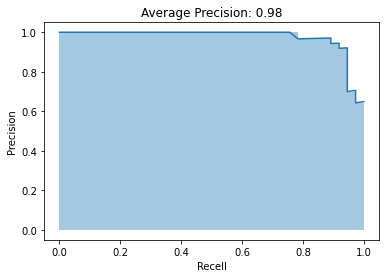

Area Under Curve: 0.98


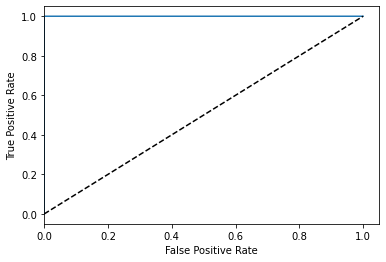

In [58]:
# Trainset Results
y_pred_proba = xgbc.predict_proba(X_train)
plt_pre(y_train, y_pred_proba[:,1])

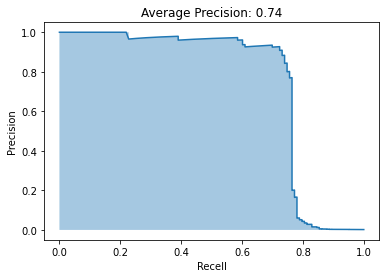

Area Under Curve: 0.74


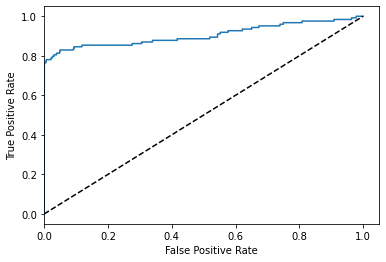

In [59]:
# Testset Results
y_pred_proba = xgbc.predict_proba(X_test)
plt_pre(y_test, y_pred_proba[:,1])

# The result achieved is incredible

# Conclusion:
#### After multiple re-run, it seems:
#### The performances of autoencoders will varied due to stochasticity
#### Semi-Supervised Learning techniques do not neccessarily improve the performance of the model
#### However, with techniques like SMOTE and OverSampling,  the performance of Semi-Supervised Learning model can have slight increase